In [257]:
import numpy as np
from scipy.integrate import solve_ivp

In [258]:
g = 9.8 # Gravitational Acceleration
L = 0.5 # Length of pendulum

m = 0.5 #mass of bob (kg)
M = 20 # mass of cart (kg)


In [259]:
print("Hello")

Hello


In [260]:
print("kiran")

kiran


In [261]:
print("ujwal")

ujwal


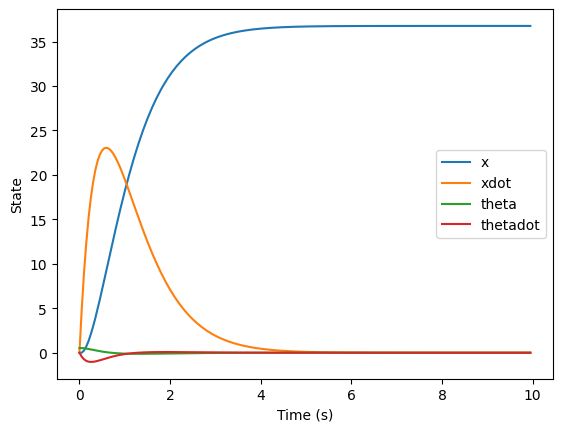

In [262]:
import numpy as np
from scipy.linalg import solve_continuous_are

# Define the system matrices
A = np.array([[0, 1, 0, 0],
              [0, 0, -0.245, 0],
              [0, 0, 0, 1],
              [0, 0, 20.09, 0]])
B = np.array([[0], [0.05], [0], [-0.01]])

# Define the initial state and control input
x = np.array([[0], [0], [np.pi/6], [0]])
u = 0

# Define the cost function weights Q and R
Q = np.diag([1000, 1000, 1, 1])  # Increase the weight of theta
R = np.array([[0.01]])  # Increase the weight of the control effort

# Compute the optimal gain matrix K using the ARE
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R + B.T @ P @ B) @ (B.T @ P @ A)



# Simulate the system for 10 seconds
dt = 0.05
t = np.arange(0, 10, dt)
x_history = np.zeros((4, len(t)))
x_history[:, 0] = x[:, 0]


for i in range(1, len(t)):
    # Compute the control input using the optimal gain matrix K
    u = -K @ x
    # Compute the derivative of the state vector
    x_dot = A @ x + B @ u
    # Update the state vector
    x = x + x_dot * dt

    # Save the state history
    x_history[:, i] = x[:, 0]

# Plot the state history
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, x_history[0, :], label='x')
plt.plot(t, x_history[1, :], label='xdot')
plt.plot(t, x_history[2, :], label='theta')
plt.plot(t, x_history[3, :], label='thetadot')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.show()


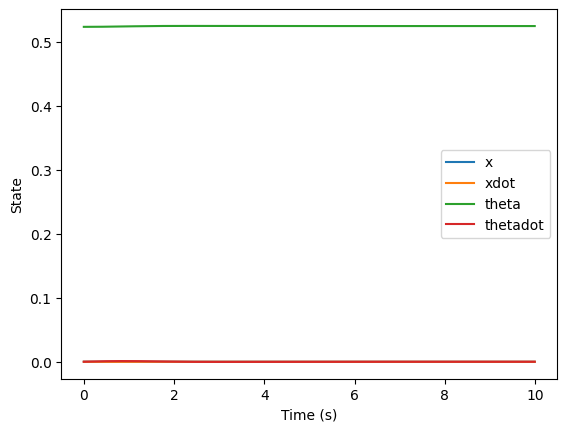

In [263]:
import numpy as np
from scipy.linalg import solve_continuous_are

# Define the system matrices
A = np.array([[0, 1, 0, 0],
              [-0.245, 0, 0, 0],
              [0, 0, 0, 1],
              [20.09, 0, 0, 0]])
B = np.array([[0], [0.05], [0], [-0.01]])

# Define the desired final value for theta
theta_f = 0

# Define the initial value for theta
theta_0 = np.pi/6

# Define the state vector x and the control input u
x = np.array([[0.0001], [0], [theta_0], [0]])
u = 0

# Define the cost function weights Q and R
Q = np.diag([1, 1, 100, 1])   # higher weight on theta for control input stability
R = np.array([[0.1]])

# Compute the optimal gain matrix K using the ARE
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R + B.T @ P @ B) @ (B.T @ P @ A)

# Simulate the system with the computed gain matrix K
t0, tf = 0, 10    # initial and final simulation time
dt = 0.01         # time step
t = np.arange(t0, tf, dt)
x_history = np.zeros((4, len(t)))
x_history[:, 0] = x[:, 0]

for i in range(1, len(t)):
    # Compute the control input using the optimal gain matrix K
    u = -K @ x

    # Update the state using the system dynamics
    x_dot = A @ x + B @ u
    x = x + x_dot * dt

    # Save the state history
    x_history[:, i] = x[:, 0]

# Plot the state history
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, x_history[0, :], label='x')
plt.plot(t, x_history[1, :], label='xdot')
plt.plot(t, x_history[2, :], label='theta')
plt.plot(t, x_history[3, :], label='thetadot')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.show()
